VGG16 ile Imagenet Dataseti

In [1]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/")


In [13]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions


In [14]:
model = VGG16(weights = "imagenet", include_top= True)

553467096/553467096 [==============================] - 9s 0us/step


In [17]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
print(layers)

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>, 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>, 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>, 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>, 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>, 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>, 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>, 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>, 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>, 'block3_conv3': <KerasTensor: shape=(None, 56, 56, 2

In [18]:
model.count_params()

138357544

In [19]:
labels = decode_predictions(np.expand_dims(np.arange(1000), axis=0), top=1000)


for label in labels[0]:
    print(label[1])

35363/35363 [==============================] - 0s 0us/step
toilet_tissue
ear
bolete
hen-of-the-woods
earthstar
stinkhorn
gyromitra
agaric
coral_fungus
buckeye
hip
acorn
corn
yellow_lady's_slipper
daisy
rapeseed
scuba_diver
groom
ballplayer
volcano
valley
seashore
sandbar
promontory
lakeside
geyser
coral_reef
cliff
bubble
alp
eggnog
cup
espresso
red_wine
burrito
potpie
pizza
meat_loaf
dough
chocolate_sauce
carbonara
hay
pomegranate
custard_apple
jackfruit
banana
pineapple
fig
lemon
orange
strawberry
Granny_Smith
mushroom
cardoon
bell_pepper
artichoke
cucumber
butternut_squash
acorn_squash
spaghetti_squash
zucchini
cauliflower
broccoli
head_cabbage
mashed_potato
hotdog
cheeseburger
pretzel
bagel
French_loaf
ice_lolly
ice_cream
trifle
hot_pot
consomme
guacamole
plate
menu
book_jacket
traffic_light
street_sign
crossword_puzzle
comic_book
web_site
yurt
yawl
wreck
worm_fence
wool
wooden_spoon
wok
wing
wine_bottle
Windsor_tie
window_shade
window_screen
wig
whistle
whiskey_jug
water_tower
wate

In [21]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/image")
%ls

2.jpg  31.jpg  elephant.jpg  img1.jpeg  img3.jpeg  img4.jpeg


['img1.jpeg', '2.jpg', 'elephant.jpg', 'img4.jpeg', 'img3.jpeg', '31.jpg']


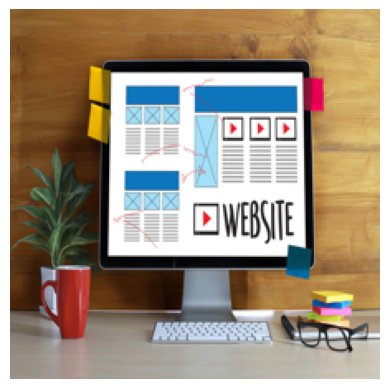

1/1 [==============================] - 1s 1s/step
desk


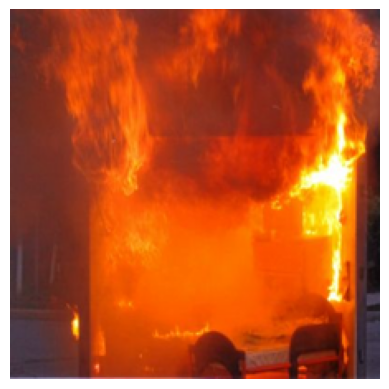

1/1 [==============================] - 2s 2s/step
volcano


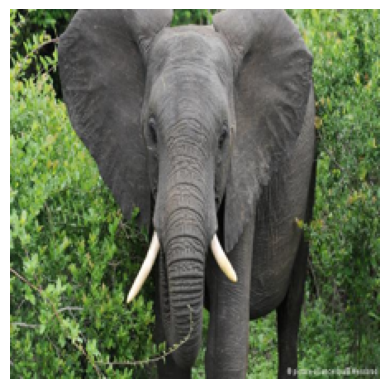

1/1 [==============================] - 1s 1s/step
tusker


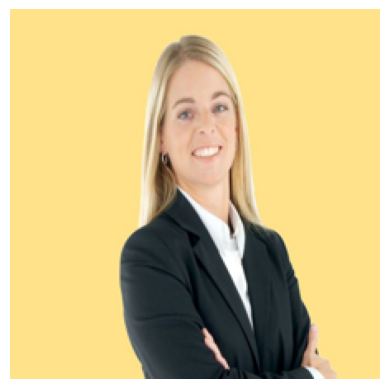

1/1 [==============================] - 1s 977ms/step
suit


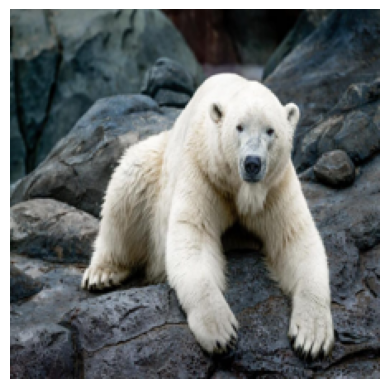

1/1 [==============================] - 1s 941ms/step
ice_bear


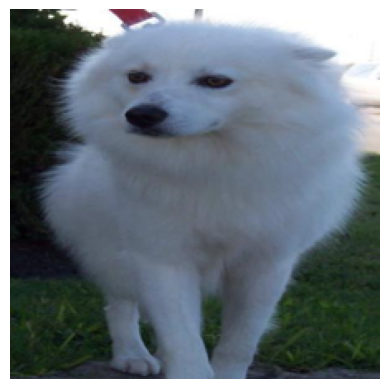

1/1 [==============================] - 1s 518ms/step
Samoyed


In [29]:
import matplotlib.pyplot as plt

path="/gdrive/My Drive/Colab Notebooks/image"
files = os.listdir(path)


for file in files:
  if (file.endswith(('.jpg', '.jpeg', '.png'))):
      img = Image.open(file)
      img = img.resize((224,224))

      plt.imshow(img)
      plt.axis('off')
      plt.show()

      x = np.array(img, dtype=float)
      x = np.expand_dims(x, axis=0)

      x = preprocess_input(x)
      preds = model.predict(x)
      print(decode_predictions(preds, top=1)[0][0][1])
